Japan's Right Turn | Democarcy Brief #1
==============================================

This notebook has been developed on [Google Colab](https://colab.research.google.com/), with the OS Ubuntu 18.04.

## Environment Setup

In [ ]:
# Package setup
install.packages(c("ggiraphExtra", "IRdisplay"))

# Install fonts that support Japanese characters (works on Ubuntu machine)
system("apt-get install -y fonts-noto-cjk")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘ggiraph’, ‘reshape2’, ‘plyr’, ‘mycor’, ‘ppcor’, ‘sjlabelled’, ‘sjmisc’




In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggiraphExtra)

# Show the packages and platform info
sessionInfo() 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: ignored

In [ ]:
# Define ggplot theme and convenience functions

mytheme <- theme_bw() + 
  theme(
     strip.background=element_blank()
    ,strip.text=element_text(face="bold")
    #,panel.grid.major=element_blank()
    ,panel.grid.minor=element_blank()
    ,text=element_text(family="Noto Sans CJK JP")
  ) 
theme_set(mytheme)

figsize <- function(width, height) {
  # change graphic size to display
  options(repr.plot.width=width, repr.plot.height=height)  
}

ggshow <- function(g=last_plot(), dispwidth=600, dispheight=NULL, tmpdir="ggtmp", ...) {
  # show ggplot graph
  # a quick workaround to the issue where
  # Japanese texts are not displayed on the notebook
  if (!dir.exists(tmpdir)) {
    if (file.exists(tmpdir)) {
      stop(sprintf("'%s' already exists as a file.", tmpdir))
    }
    dir.create(tmpdir, recursive=TRUE)
  }
  tmpfile <- file.path(tmpdir, "tmp.jpg")
  ggplot2::ggsave(tmpfile, g, ...)
  IRdisplay::display_jpeg(file=tmpfile, width=dispwidth, height=dispheight)
}

## Data Preparation

We use *V-Party data*, freely available at the [V-Dem Project website](https://www.v-dem.net/en/data/data/v-party-dataset/).

In [ ]:
# download data if not exist locally yet
datadir <- "data"
if (!dir.exists(datadir)) dir.create(datadir)

srcurl <- "http://v-dem.pol.gu.se/v-party/v1/CPD_V-Party_CSV_v1.zip"
zippath <- file.path(datadir, "CPD_V-Party_CSV_v1.zip")
if (!file.exists(zippath)) {
  message("Downloading: ", srcurl, "...")
  download.file(srcurl, zippath)
}
unzip(zippath, exdir=datadir)

# make sure
csvfile <- file.path(datadir, "CPD_V-Party_CSV_v1/V-Dem-CPD-Party-V1.csv")
stopifnot(file.exists(csvfile))

Downloading: http://v-dem.pol.gu.se/v-party/v1/CPD_V-Party_CSV_v1.zip...



In [ ]:
vparty_data <- read.csv(csvfile, as.is=TRUE)
head(vparty_data)

,v2paenname,v2paorname,v2pashname,v2paid,pf_party_id,party_gaps,pf_url,country_name,histname,country_id,⋯,ep_galtan_salience,GPS_ID,ep_members_vs_leadership,ep_v6_lib_cons,ep_people_vs_elite,ep_v7_lib_cons_saliency,ep_type_populism,ep_type_populist_values,ep_v8_popul_rhetoric,ep_v9_popul_saliency
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Party of the Democratic Revolution,,PRD,216,216,,https://partyfacts.herokuapp.com/data/partycodes/216/,Mexico,United Mexican States,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Visualization

## Illiberal index of Japanese parties at 2017 election

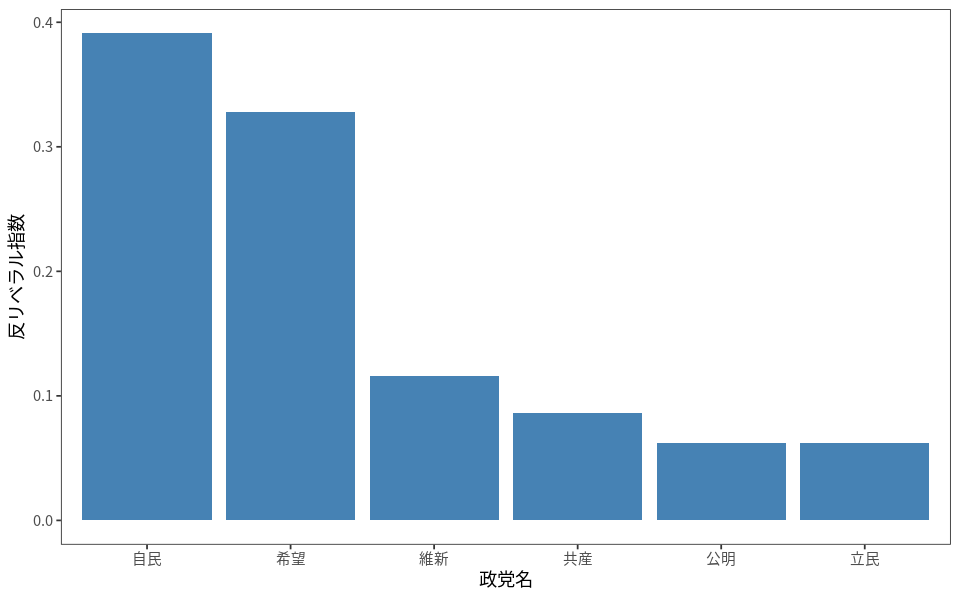

In [ ]:
# Set mapping between party code and party name in Japanese
party_names <- c(
   "LDP"="自民"
  ,"DPJ"="民主"
  ,"KDP"="立民"
  ,"JCP"="共産"
  ,"K"="公明"
  ,"JReP"="維新"
  ,"JSP/SDP"="社民"
  ,"PH"="希望"
)


g1 <- vparty_data %>%
  filter(country_name == "Japan", year == 2017, v2pashname != "indep") %>%
  select(v2paenname, v2pashname, v2xpa_illiberal) %>%
  mutate(patyname_jp = party_names[v2pashname]) %>%
ggplot(aes(x = reorder(patyname_jp, -v2xpa_illiberal), y = v2xpa_illiberal)) +
  geom_bar(stat="identity", fill="steelblue") +
  labs(x="政党名", y="反リベラル指数") +
  theme(
    # Hide panel borders and remove grid lines
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )

figsize(8, 5)
g1

## Comparison of Illiberal index across OECD countries and Japan

Joining, by = c("country_name", "year")



,country_name,country_name_jp,year,v2pagovsup,v2pashname,v2xpa_illiberal,name,dispname,is_japan
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
1,Mexico,メキシコ,2018,0,MORENA,0.700,メキシコ,メキシコ(2018),FALSE
2,Sweden,スウェーデン,2018,0,S,0.041,スウェーデン,スウェーデン(2018),FALSE
3,Japan,日本,2017,0,LDP,0.391,自民党(日本),自民党(日本)(2017),TRUE
4,Japan,日本,2017,3,KDP,0.062,立憲民主党(日本),立憲民主党(日本)(2017),TRUE
5,Poland,ポーランド,2019,0,PiS,0.797,ポーランド,ポーランド(2019),FALSE
6,United States of America,アメリカ,2018,0,Rep,0.690,アメリカ,アメリカ(2018),FALSE


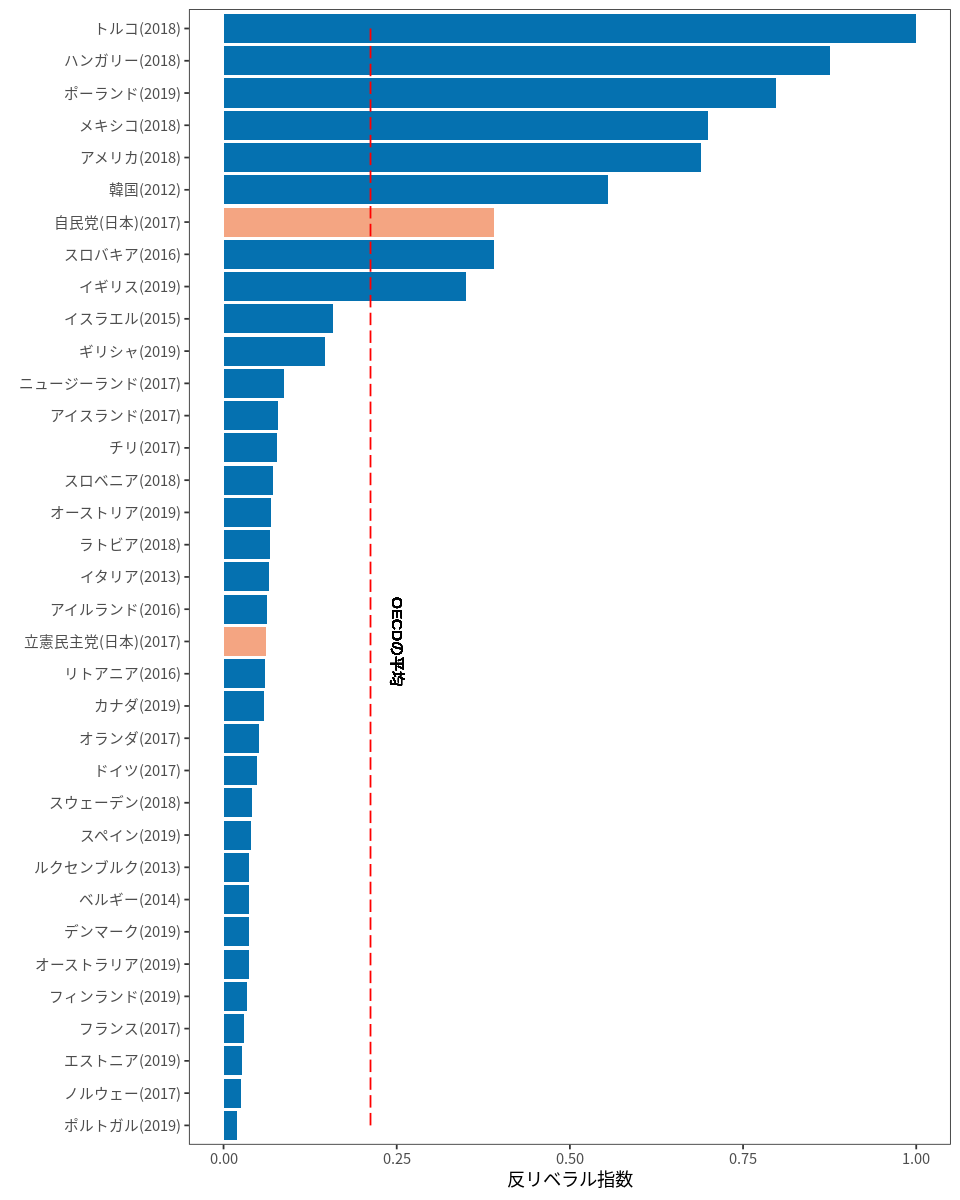

In [ ]:
# mapping of OECD country names to Japanese name
OECD_countries <- c(
   'Australia'='オーストラリア'
  ,'Austria'='オーストリア'
  ,'Belgium'='ベルギー'
  ,'Canada'='カナダ'
  ,'Chile'='チリ'
  ,'Denmark'='デンマーク'
  ,'Estonia'='エストニア'
  ,'Finland'='フィンランド'
  ,'France'='フランス'
  ,'Germany'='ドイツ'
  ,'Greece'='ギリシャ'
  ,'Hungary'='ハンガリー'
  ,'Iceland'='アイスランド'
  ,'Ireland'='アイルランド'
  ,'Israel'='イスラエル'
  ,'Italy'='イタリア'
  ,'Japan'='日本'
  ,'South Korea'='韓国'
  ,'Latvia'='ラトビア'
  ,'Lithuania'='リトアニア'
  ,'Luxembourg'='ルクセンブルク'
  ,'Mexico'='メキシコ'
  ,'Netherlands'='オランダ'
  ,'New Zealand'='ニュージーランド'
  ,'Norway'='ノルウェー'
  ,'Poland'='ポーランド'
  ,'Portugal'='ポルトガル'
  ,'Slovakia'='スロバキア'
  ,'Slovenia'='スロベニア'
  ,'Spain'='スペイン'
  ,'Sweden'='スウェーデン'
  ,'Switzerland'='スイス'
  ,'Turkey'='トルコ'
  ,'United Kingdom'='イギリス'
  ,'United States of America'='アメリカ'
)

oecd_data <- vparty_data %>%
  filter(country_name %in% names(OECD_countries)) %>%
  mutate(country_name_jp = OECD_countries[country_name]) %>%
  select(country_name, country_name_jp, year, v2pagovsup, v2pashname, v2xpa_illiberal)

oecd_latest <- filter(oecd_data, v2pagovsup==0) %>%
  group_by(country_name) %>%
  summarize(year=max(year))

oecd_data <- inner_join(oecd_data, oecd_latest) %>%
  filter(v2pagovsup==0 | (v2pashname == "KDP" & country_name == "Japan")) %>%
  mutate(name = if_else(
    country_name == "Japan",
    if_else(v2pashname == "LDP", "自民党(日本)", "立憲民主党(日本)"),
    country_name_jp
  )) %>%
  mutate(dispname = sprintf("%s(%d)", name, year)) %>%
  mutate(is_japan = (country_name == "Japan"))
head(oecd_data)

# Average of the OECD ruling parties
oecd_mean <- mean(oecd_data$v2xpa_illiberal[oecd_data$v2pagovsup == 0])

g2 <- ggplot(oecd_data, aes(x = v2xpa_illiberal, y=reorder(dispname, v2xpa_illiberal), fill=is_japan)) +
  theme(legend.position = "none") +
  geom_bar(stat="identity") +
  #scale_fill_brewer(palette="Dark2") +  #color brewer
  scale_fill_manual(values=c('#0571b0', '#f4a582')) +
  labs(x="反リベラル指数", y=element_blank()) +
  geom_line(aes(x = oecd_mean), size = 0.5, color="red", group = 1, linetype="longdash") +
  geom_text(aes(x = 0.25, y = 16, label="OECDの平均"), angle = -90,  size=3.2) +
  # Hide panel borders and remove grid lines
  theme(
    #panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )
figsize(8, 10)
g2

## Time-series of Illiberal index of Japanese parties

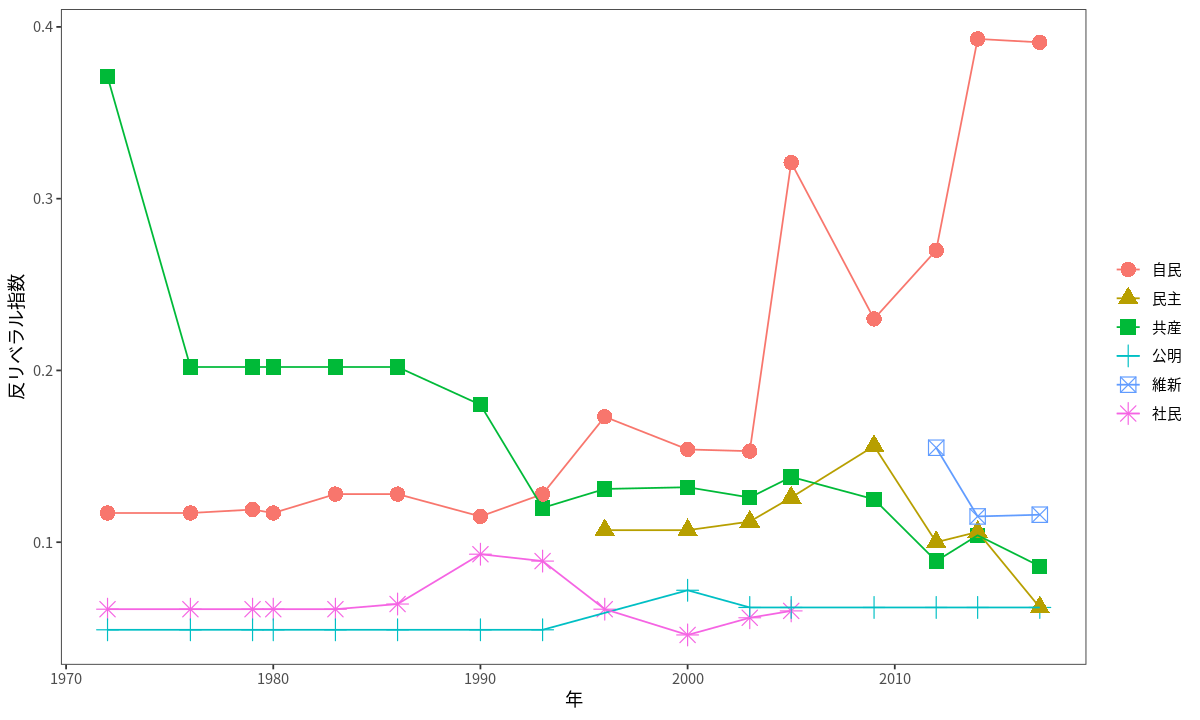

In [ ]:
# map party code to Japanese name
japan_parties <- c(
   'LDP'='自民'
  ,'DPJ'='民主'
  ,'K'='公明'
  ,'KDP'='民主'
  ,'JReP'='維新'
  ,'JCP'='共産'
  ,'JSP/SDP'='社民'
)
# factorize to keep the order
japan_parties <- factor(japan_parties,
                        levels=c("自民", "民主", "共産", "公明", "維新", "社民"))

g3 <- vparty_data %>%
  filter(country_name == "Japan", year >= 1970, v2pashname %in% names(japan_parties)) %>%
  mutate(name_jp = japan_parties[v2pashname]) %>%
  select(v2pashname, name_jp, year, v2xpa_illiberal) %>%
ggplot(aes(x = year, y = v2xpa_illiberal, group = name_jp, pch = name_jp, color = name_jp)) + 
  labs(x="年", y="反リベラル指数") +
  theme(legend.title=element_blank()) +
  geom_point(size = 4) +
  geom_line() +
  theme(
    # Hide panel borders and remove grid lines
    #panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )
figsize(10, 6)
g3

## Profile of Japanese parties in 2000 and 2017

We use the following six indices to quantify the profile of political parties that are relevant to Japan's political context.  
Indices except for `v2pariglef` are reversed so that higher values indicate less inclusive attitude.

- `v2paminor`: Attitude towards minority groups
- `v2paimmig`: Attitude towards immigrants 　
- `v2palgbt`: Attitude towards LGBT
- `v2paculsup`: Promotion of cultural speriority
- `v2parelig`: Invocation of gods or religious texts
- `v2pariglef`: Economic left-right scale


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


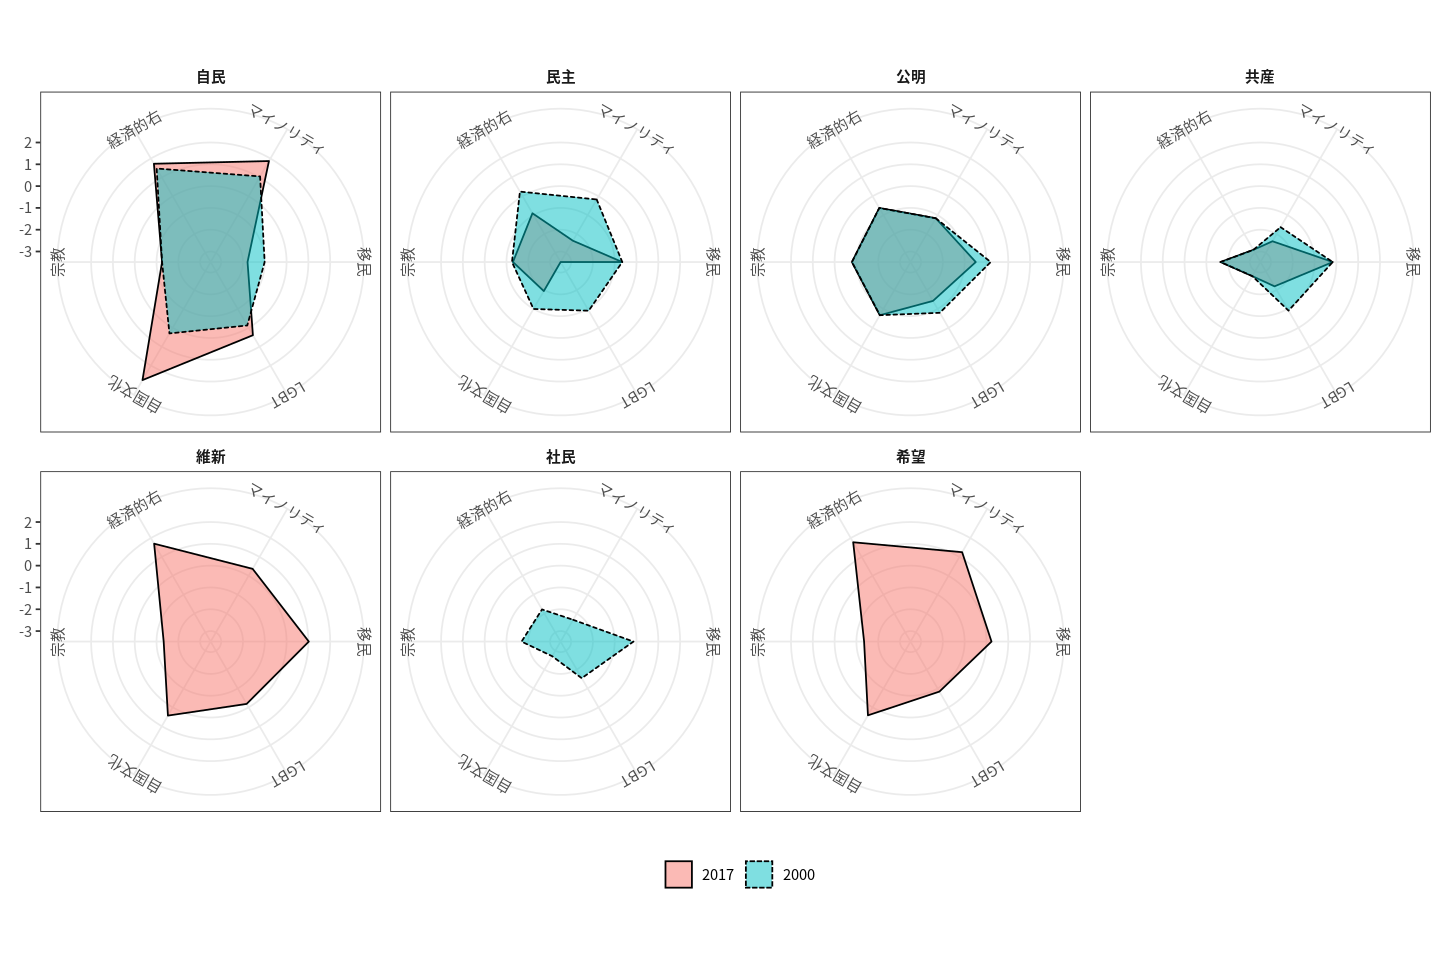

In [ ]:
variable_jp <- c(
   "v2paminor"="マイノリティ"
  ,"v2paimmig"="移民"
  ,"v2palgbt"="LGBT"
  ,"v2paculsup"="自国文化"
  ,"v2parelig"="宗教"
  ,"v2pariglef"="経済的右"
)
variable_jp <- factor(variable_jp, levels=variable_jp)

g4 <- filter(vparty_data, country_name=="Japan", year %in% c(2000, 2017), v2pashname %in% c("LDP", "DPJ", "K", "KDP", "JReP", "JCP", "JSP/SDP", "PH")) %>%
  select(country_name, year, v2pashname,
         v2paminor, v2paimmig, v2palgbt, v2paculsup, v2parelig, v2pariglef) %>%
  pivot_longer(cols=-c(country_name, year, v2pashname)) %>%
  mutate(partyname_jp=party_names[v2pashname],
         index_jp=variable_jp[name]) %>%
  arrange(index_jp) %>%
  mutate(year_fct=factor(year, levels=c(2017, 2000))) %>%
  mutate(value=if_else(index_jp=="経済的右", value, -value)) %>%
  mutate(partyname_jp=if_else(partyname_jp=="立民", "民主", as.character(partyname_jp))) %>%
  mutate(partyname_jp=factor(partyname_jp, levels=c("自民", "民主", "公明", "共産", "維新", "社民", "希望"))) %>%

ggplot(aes(index_jp, value, group=year_fct,
           fill=year_fct, linetype=year_fct)) +
  geom_polygon(color="black", alpha=0.5) +
  coord_radar(theta="x") +
  theme(legend.position="bottom", legend.title=element_blank()) +
  xlab(element_blank()) + 
  ylab(element_blank()) + 
  facet_wrap(vars(partyname_jp), ncol=4)

angles <- -30 + (0:5)*(-60)  # hard coded since we know there are exactly six points
g4 <- g4 + theme(axis.text.x = element_text(angle=angles))
options(warn=-1)
figsize(12, 8)
g4
options(warn=0)
